# Сборный проект. Анализ игровой индустрии.

В вашем распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

**Ход исследования**

Входные данные — собранные из открытых источников исторические данные об играх, мы получим из файла `Games csv.csv`. О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

*Описание данных:*

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Исследование пройдёт в пять основных этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона
5. Проверка гипотез

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Перевод-данных-к-нужному-типу" data-toc-modified-id="Перевод-данных-к-нужному-типу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Перевод данных к нужному типу</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Добавление-суммы-продаж" data-toc-modified-id="Добавление-суммы-продаж-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Добавление суммы продаж</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выпуск-игр-по-годам" data-toc-modified-id="Выпуск-игр-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выпуск игр по годам</a></span></li><li><span><a href="#Количество-выпущенных-игр-по-платформам" data-toc-modified-id="Количество-выпущенных-игр-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество выпущенных игр по платформам</a></span></li><li><span><a href="#Динамика-продаж-по-топ-платформам." data-toc-modified-id="Динамика-продаж-по-топ-платформам.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Динамика продаж по топ платформам.</a></span></li><li><span><a href="#Динамика-продаж-игр-за-актуальный-период" data-toc-modified-id="Динамика-продаж-игр-за-актуальный-период-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Динамика продаж игр за актуальный период</a></span></li><li><span><a href="#Построение-графика-Boxplot-по-глобальным-продажам-игр-в-разбивке-по-платформам" data-toc-modified-id="Построение-графика-Boxplot-по-глобальным-продажам-игр-в-разбивке-по-платформам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Построение графика Boxplot по глобальным продажам игр в разбивке по платформам</a></span></li><li><span><a href="#Влияние-отзывов-пользователей-и-критиков-на-продажи" data-toc-modified-id="Влияние-отзывов-пользователей-и-критиков-на-продажи-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Влияние отзывов пользователей и критиков на продажи</a></span></li><li><span><a href="#Влияние-отзывы-пользователей-и-критиков-на-продажи-по-топовым-платформам" data-toc-modified-id="Влияние-отзывы-пользователей-и-критиков-на-продажи-по-топовым-платформам-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Влияние отзывы пользователей и критиков на продажи по топовым платформам</a></span></li><li><span><a href="#Общее-распределение-игр-по-жанрам" data-toc-modified-id="Общее-распределение-игр-по-жанрам-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Общее распределение игр по жанрам</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-платформы-по-регионам" data-toc-modified-id="Самые-популярные-платформы-по-регионам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Самые популярные платформы по регионам</a></span></li><li><span><a href="#Самые-популярные-жанры-по-регионам" data-toc-modified-id="Самые-популярные-жанры-по-регионам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Самые популярные жанры по регионам</a></span></li><li><span><a href="#Влияние-рейтинга-ESRB-на-продажи-в-отдельном-регионе" data-toc-modified-id="Влияние-рейтинга-ESRB-на-продажи-в-отдельном-регионе-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние рейтинга ESRB на продажи в отдельном регионе</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-и-Sports" data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-и-Sports-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action и Sports</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

Загрузим необходимые для исследования библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from scipy import stats as st
plt.style.use('seaborn-whitegrid')
print('Setup complete')

Setup complete


Загрузим файл и присвоим его переменной df. Выведем первые 15 строк и информацию о данных.

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('datasets/Games csv.csv')
display(df.head(15))
print(df.info())
df.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**   
По полученным данным можно сделать первые выводы по каждому столбцу:

- `Name` — есть пару пропусков, это не критично.
- `Year_of_Release` — есть пропуски, данные необходимо перевести в целочисленный формат.
- `Genre` — так же имеются пару пропусков.
- `NA_sales` — имеются нулевые значения, возможно игра была бесплатной.
- `EU_sales` — имеются нулевые значения, возможно игра была бесплатной.
- `JP_sales` — имеются нулевые значения, возможно игра была бесплатной.
- `Other_sales` — имеются нулевые значения, возможно игра была бесплатной.
- `Critic_Score` — минимальная оценка 13, максимальная 98. Медианой является 71 балл. Имеется большое кол-во пропущенных значений. Так же можно заменить тип данных на целочисленный.
- `User_Score` — данные необходимо перевести в вещественный формат. Имеется большое кол-во пропусков. 
- `Rating` — Так же имеются пропуски. Вероятно игра появилась ранее появления данного рейтинга или же ещё не была оценена.

## Предобработка данных

Сделаем необходимую для исследования предобработку данных.   
Для начала приведём наименования столбцов к нижнему регистру.

In [3]:
df.columns = (column.lower() for column in df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Перевод данных к нужному типу     
Переведём данные в столбцах `year_of_release`, `critic_score` и `user_score` к нужному типу.   
Начнём с `year_of_release`

In [4]:
df['year_of_release'] = df[df['year_of_release'].notnull()]['year_of_release'].astype('int')
df['critic_score'] = df[df['critic_score'].notnull()]['critic_score'].astype('int')

Перед изменением типа в столбце user_score посмотрим на все уникальные значения данного столбца

In [5]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков имеется значение "tbd".   
Почитав FAQ Metacritic, найдем, что это аббревиатура от **To Be Determined**. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Возможно это малопопулярные игры, или игры, основная аудитория которых не знает английского языка.   
Будем считать что "tbd" являются пропусками. Заменим "tbd" на NaN.

In [6]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df[df['user_score'].notnull()]['user_score'].astype('float')

### Заполнение пропусков   
Посмотрим процент пропусков по каждому столбцу.

In [7]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).round(2)

user_score         54.59
critic_score       51.32
rating             40.48
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64

Практически половина данных отсутствует по столбцам `critic_score`, `rating` и `user_score`.   
Возможно рейтинг по каким-то играм просто не собирался, или же игры вышли раньше появления рейтинга игр как такового.   
Заполнить пропуски медианой или средним по жанрам и плаформам будет не правильным. Что бы не портить общую картину лучше оставить оценки без заполнения.   
Пропуски в `year_of_release` очень не приятны, но заполнить их так же не чем.   
Пропуски в `rating` заменим на `unkonwn`.

In [8]:
df['rating'] = df['rating'].fillna('unknown')

### Поиск дубликатов   
Проверим данные на наличие дубликатов

In [9]:
print('Кол-во дубликатов:', df.duplicated().sum())

Кол-во дубликатов: 0


### Добавление суммы продаж   
Добавим столбец `sum_sales` в котором будет сумма продаж во всех регионах

In [10]:
# df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# Here we'll apply alternative way to count 'sum_sales'
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Исследовательский анализ данных   
Напишем функцию для построения графиков.

In [11]:
def create_bar(groupby_column, y='name'):
    to_plot = df.groupby(groupby_column)[y]
    if groupby_column == 'year_of_release':
        to_plot_calcul = to_plot.count()
        figsize = (15,5)
        plot = to_plot_calcul.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif groupby_column == 'platform':
        to_plot_calcul = to_plot.count().sort_values()
        figsize = (15,10)
        plot = to_plot_calcul.plot(kind='barh', y=y, figsize=figsize, ec='black')

### Выпуск игр по годам   
Построим график с количеством игр по каждому году используя написанную функцию

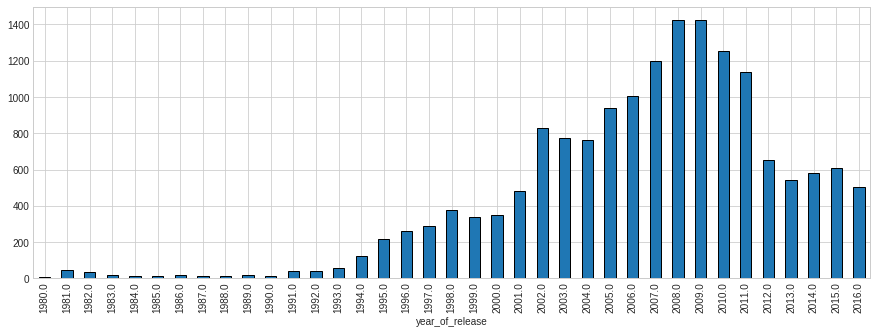

In [12]:
create_bar('year_of_release')

До 1994 года игр практически не было. Потом они начали появляться. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция социальных сетей в жизнь людей. Интерес к играм стал падать и соотвественно их производство.

### Количество выпущенных игр по платформам   
Посмотрим на то, сколько игр выпускалось на каждую платформу за весь анализируемый период:

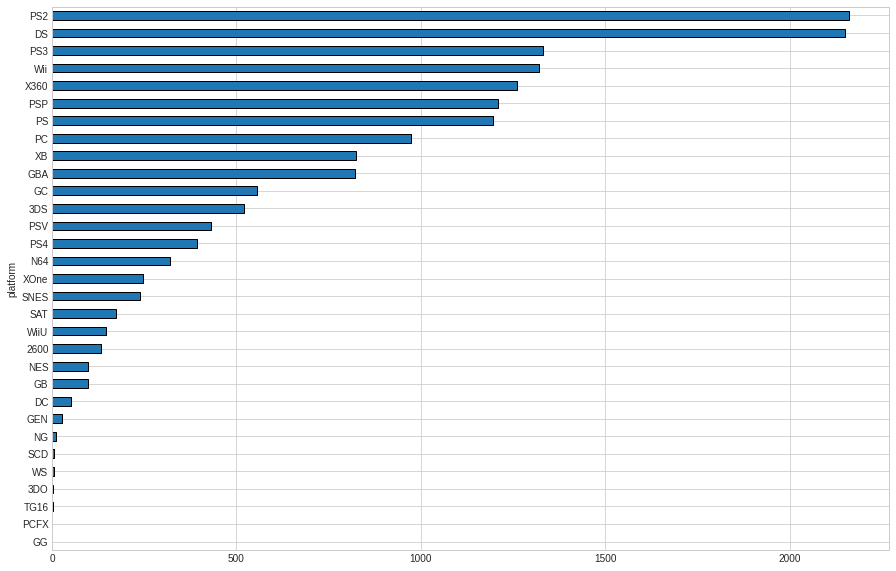

In [13]:
create_bar('platform')

Лидером является платформа PS2, вслед за ней идёт DS, которая наступает данной платформе на пятки. Далее идут PS3, Wii и X360.   
Самые редкие платформы - представители японских технологий.

### Динамика продаж по топ платформам.   
Для начала выделим топ платформ по объёму продаж.

In [14]:
df.groupby('platform')['sum_sales'].sum().to_frame('sum_sales').sort_values(by='sum_sales', ascending=False).head(10)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Безусловным лидером является платформа PS2. Ожидаемо, она у всех давно на слуху. Далее идут Xbox360, PS3 и Wii.   
Здесь мы можем выделить 6 лидеров индустрии: **PS2, X360, PS3, Wii, DS и PS**   
Построим график объемов продаж по годам для топ платформ.

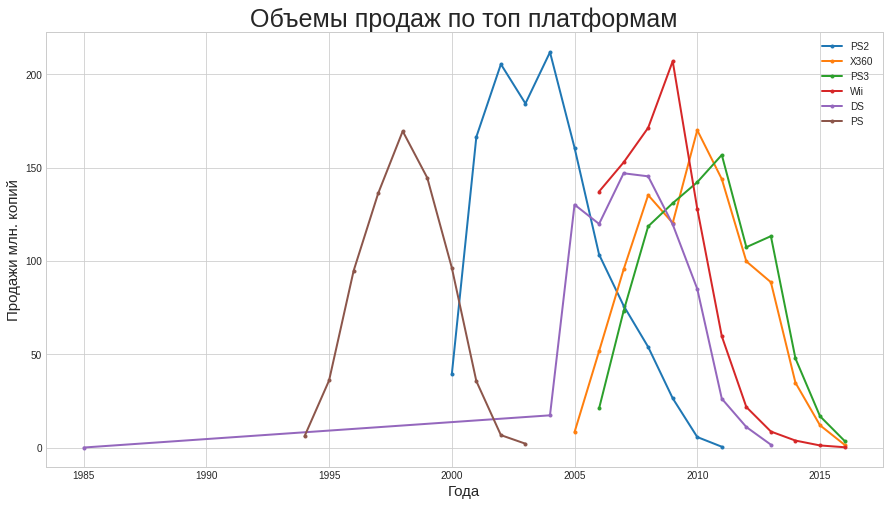

In [15]:
top_platforms = (df.groupby('platform')['sum_sales']
                 .sum()
                 .to_frame('sum_sales')
                 .nlargest(6, 'sum_sales')
                 .reset_index()['platform']
                 .to_list())

ax = plt.gca()
legend_list = []
for platform in top_platforms:
    (df.query('platform == @platform')
     .groupby('year_of_release')['sum_sales'].sum()
     .plot(x='year_of_release', 
          y='sum_sales', 
          style='.-', 
          kind='line', 
          fontsize=10, 
          linewidth=2, 
          figsize=(15,8), 
          label=platform))
    legend_list.append(platform)
    
ax.legend(legend_list)
plt.title('Объемы продаж по топ платформам', fontsize=25)
plt.xlabel("Года", fontsize=15)
plt.ylabel('Продажи млн. копий', fontsize=15);

Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

PS - прожила с 1994 года до 2003, почти 10 лет.   
PS2 - с 2000 до 2011 года - 11 лет.   
PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом в 2013 году PS4.   
DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни.   
Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет.   
Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

### Динамика продаж игр за актуальный период   
Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

Актуальным периодом является 2012 - 2016 года, так как за этот период уже вышли или только выходят все популярные платформы, **а уже существующие ещё не утратили своей актуальности.**

Построим еще один график по объёму продаж платформ начиная с 2012 года.

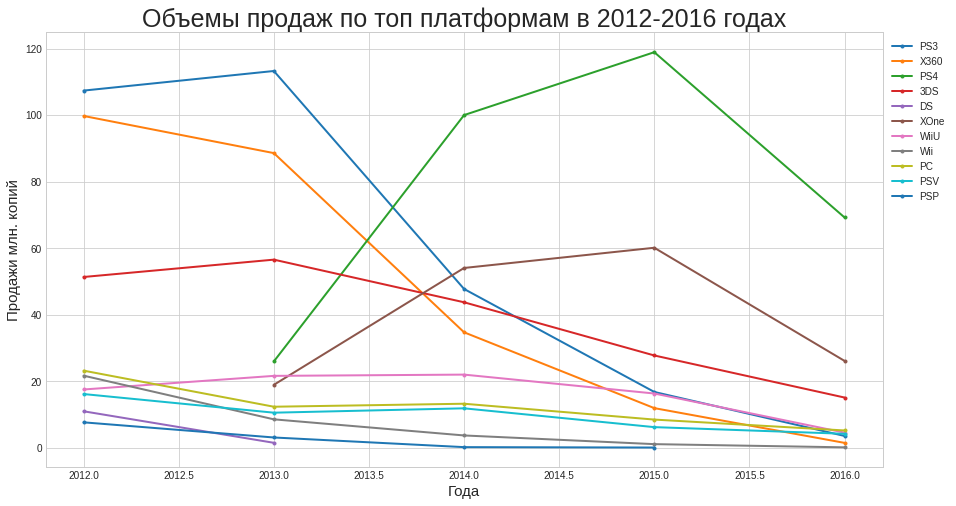

In [16]:
platforms_since2012 = df.query('year_of_release >= 2012')['platform'].unique().tolist()
ax = plt.gca()
legend_list = []
for platform in platforms_since2012:
    (df.query('platform == @platform and year_of_release >= 2012')
     .groupby('year_of_release')['sum_sales'].sum()
     .plot(x='year_of_release', 
          y='sum_sales', 
          style='.-', 
          kind='line', 
          fontsize=10, 
          linewidth=2, 
          figsize=(15,8), 
          label=platform))
    legend_list.append(platform)
    
ax.legend(legend_list, bbox_to_anchor=(1.0, 1.0))
plt.title('Объемы продаж по топ платформам в 2012-2016 годах', fontsize=25)
plt.xlabel("Года", fontsize=15)
plt.ylabel('Продажи млн. копий', fontsize=15);

# New DataFrame creation
df_2012 = df.query('year_of_release >= 2012')

На конец 2016 года лидируют по продажам следующие платформы:

 - PS4
 - Xone
 - 3DS
 
Это топ-3. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

### Построение графика Boxplot по глобальным продажам игр в разбивке по платформам
Для начала напишем функцию, котрой будем строить графики

In [17]:
def create_sales_boxplot(title=None, query=None, ylims=None):
    %matplotlib inline
    if query == None:
        ax = df_2012.boxplot(column='sum_sales', figsize=(25,10), fontsize=25)
    else:
        df_query = df_2012.query(query)
        by_column = query.split()[0]
        ax = df_query.boxplot(column='sum_sales', by=by_column, figsize=(25,10), fontsize=25)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, fontsize=25)

Построим график по всем платформам

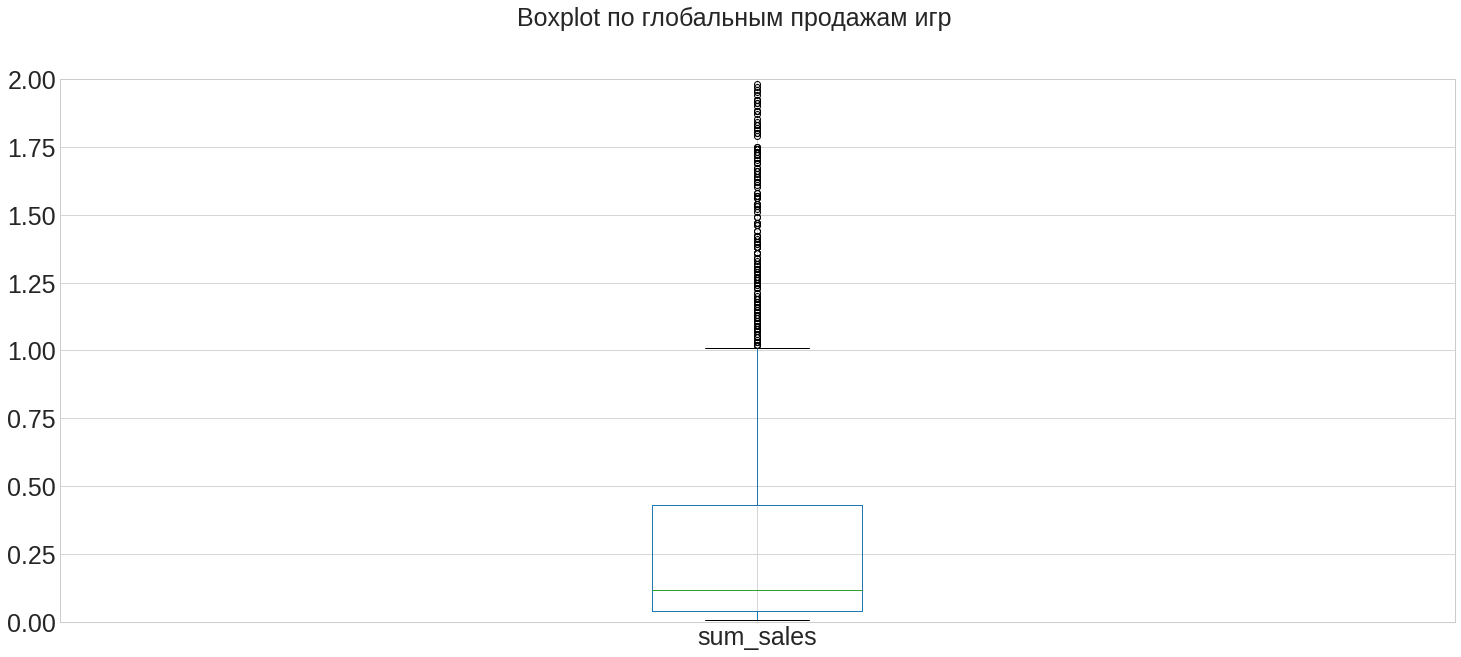

In [18]:
create_sales_boxplot('Boxplot по глобальным продажам игр', ylims=[0,2])

В среднем, продажи игр составляют до 1 млн долларов. Медиана примерно - 0,1 миллиона долларов. Не сказать, что это много.   
Посмотрим график по популярным платформам на конец 2016 года от их объёма продаж в данном году.

In [19]:
df_2012.query('year_of_release >= year_of_release.max()').groupby('platform')['sum_sales'].sum().to_frame('sum_sales').sort_values(by='sum_sales', ascending=False).head(10)

,sum_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


В 2016 году актуальными остаются только 9 платформ.   
Посмотрим лидеров за актуальный период.

In [20]:
df_2012.groupby('platform')['sum_sales'].sum().to_frame('sum_sales').sort_values(by='sum_sales', ascending=False).head(10)

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Здесь мы можем выделить 5 лидеров индустрии: **PS4, PS3, X360, 3DS, XOne.** Между XOne и WiiU разница почти в два раза. Но возьмём первые 8 для анализа.

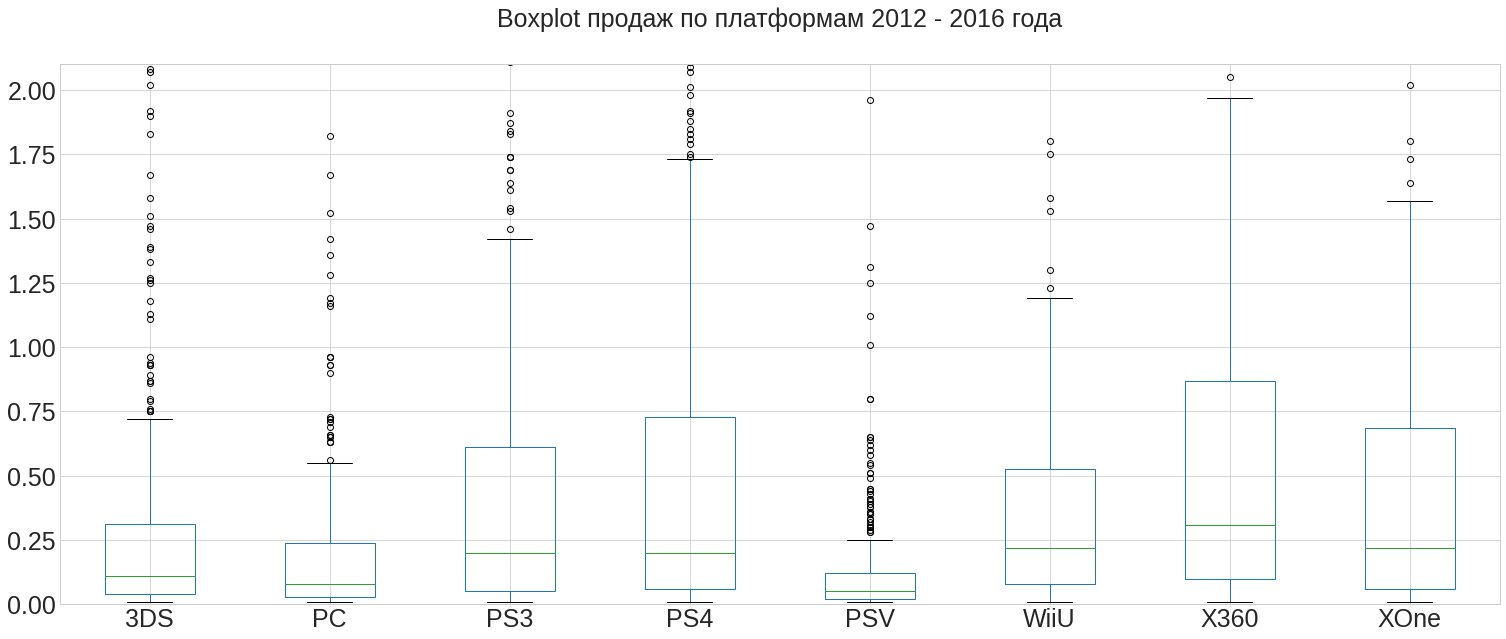

In [21]:
top_platforms2012 = (df_2012
                     .groupby('platform')['sum_sales']
                     .sum()
                     .to_frame('sum_sales')
                     .nlargest(8, 'sum_sales')
                     .reset_index()['platform']
                     .to_list())

create_sales_boxplot('Boxplot продаж по платформам 2012 - 2016 года', query="platform in @top_platforms2012", ylims=[0,2.1])

Здесь выделятся X360 с медианой более 0,25 млн долларов прибыли за игру, далее идут XOne и WiiU, имеющие медиану чуть ниже 0,25 млн долларов.   
Верхняя граница предела, за которыми уже определяются аномалии, у трёх платформ - PS3, PS4, XOne и X360 - на уровне 1,5 - 2 млн долларов.   
У WiiU - от 1,25, а 3DS - от 0,75 миллионов долларов.   
Аутсайдерами являются PC и PSV. Вероятнее всего это связано с тем что на PC распространено пиратсво и имеется множество бесплатных игр, а PSV не набрала своей популярности.

### Влияние отзывов пользователей и критиков на продажи     
За образец возьмем PS3 - она давно на рынке, по ней много данных, при этом даже на конец 2016 года она входит в топ 10 самых популярных и продаваемых игровых платформ. Построим диаграмму рассеивания зависимости общей суммы продаж игры от отзывов критиков.

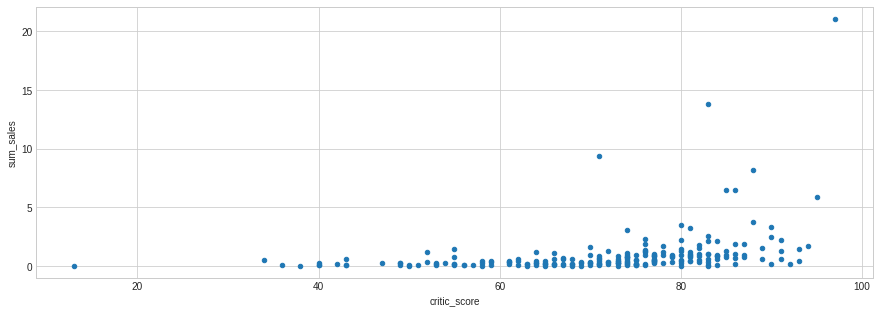

In [22]:
games_ps3 = df_2012[df_2012['platform'] == 'PS3'].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='sum_sales', figsize=(15,5));

На графике видно что чем выше средняя оценка критиков, тем больше игра приносит прибыли.   
Теперь посмотрим тоже самое по рейтингу пользователей.

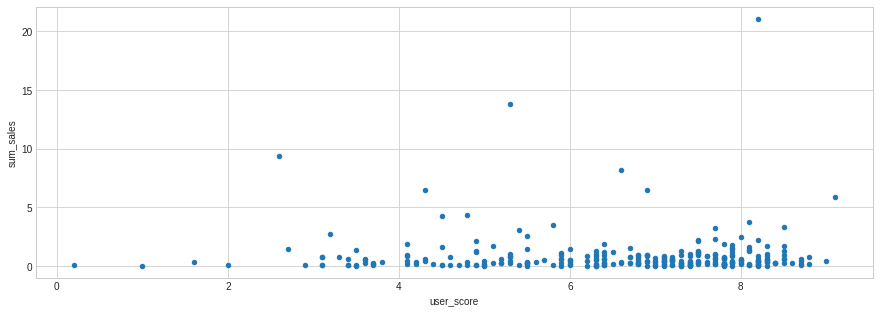

In [23]:
games_ps3.plot(kind='scatter', x='user_score', y='sum_sales', figsize=(15,5));

В целом картина индетична, но есть некоторые выборсы. Вероятнее всего это связано с неоправданными ожиданиями пользователей, которые оценивают игры уже после покупки игры из серии.   
Посмотрим на показатели корреляции. 

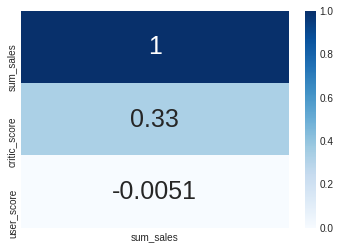

In [24]:
sns.heatmap(games_ps3[['sum_sales' ,'critic_score', 'user_score']]
            .corr()[['sum_sales']]
            .sort_values(by='sum_sales', ascending=False), 
            cmap="Blues", 
            annot=True, 
            annot_kws={'size':25});

Больше всего на конечную прибыль влияет оценка критиков. Оценка пользователей практически не оказывает влияния на доходность игры. Вероятнее всего это связано с личными ожиданиями пользователей, в том числе и в отношении стоимости самой игры. Пользователь может поставить низкую оценку хорошей игре только из-за её высокой, по его мнению, стоимости.

### Влияние отзывы пользователей и критиков на продажи по топовым платформам

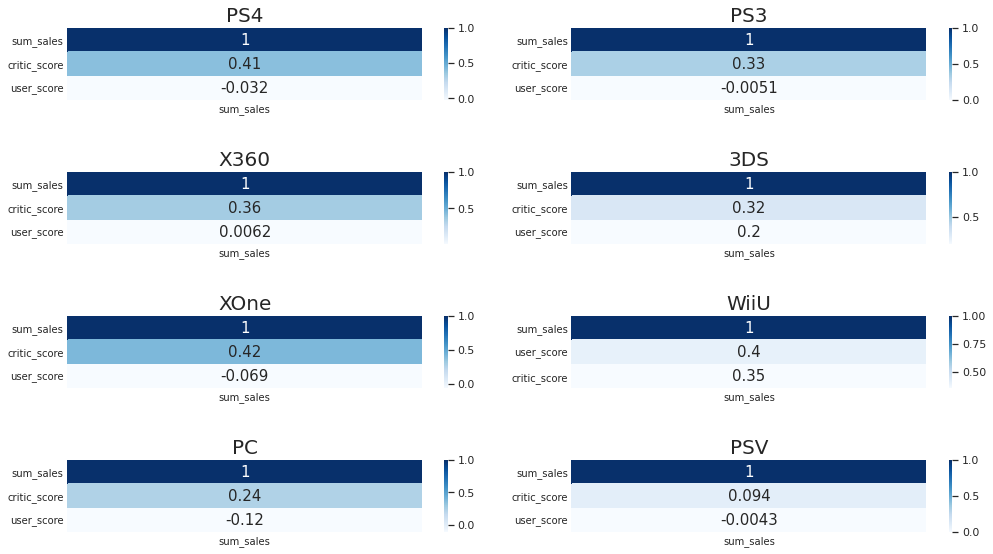

In [25]:
rows = len(top_platforms2012) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms2012[count]
        df_prep = df_2012[df_2012['platform'] == curr_platform].copy()
        
        df_filtered = df_prep[['sum_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sum_sales']].sort_values(by='sum_sales', ascending=False), 
                         cmap="Blues", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между выручкой и оценкой по платформам X360, PS3, WiiU, PS4 и XOne более или менее совпадает с общими данными по датафрейму.   
Выделяются PSV и PC, по которым зависимость несколько ниже.   
Кстати, есть платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы PS4 и Xone. PS4 и Xone - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных о них нет. Тоже самое можно скахзать про PSV.

Посмотрим на диаграммы рассеивания для значений оценок критиков и суммы продаж ещё раз.

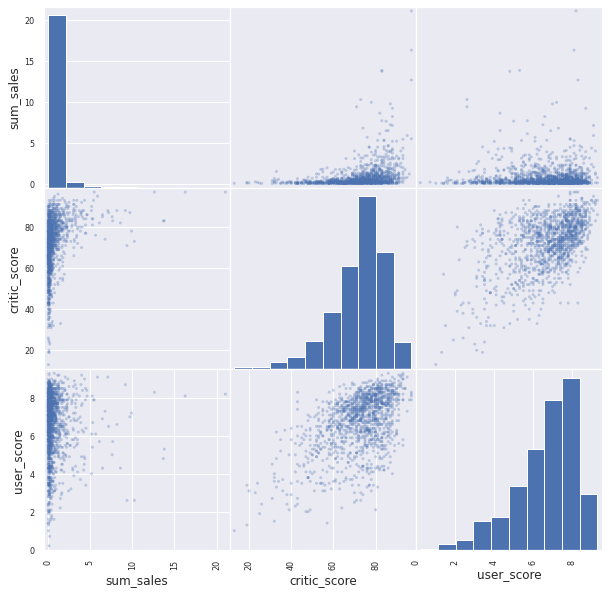

In [26]:
pd.plotting.scatter_matrix(df_2012[['sum_sales', 'critic_score', 'user_score']], figsize=(10, 10), alpha=0.3);

Здесь мы видим что оценки распределены не равномерно. У критиков и пользователей преобладают хорошие оценки игр что так же оказывает влияние на диаграммы рассеивания.

### Общее распределение игр по жанрам   
Построим столбчатую диаграмму по кол-ву и объёмам продаж игр по каждому жанру.

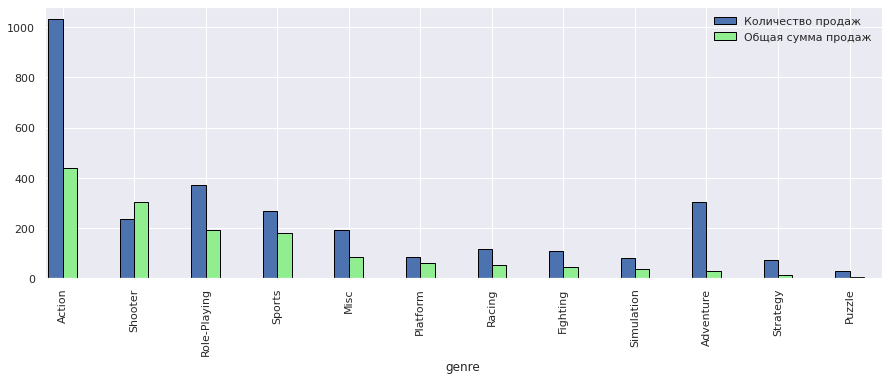

In [27]:
ax = plt.gca()

pivot = df_2012.groupby('genre').agg({'name': 'count', 'sum_sales': 'sum'}).sort_values(by='sum_sales', ascending=False)
plot1 = pivot['name']
plot2 = pivot['sum_sales']

plot1.plot(kind='bar', position=1, figsize=(15,5), width=0.2, ec='black')
plot2.plot(kind='bar', position=0, figsize=(15,5), width=0.2, color='lightgreen', ec='black')

ax.legend(['Количество продаж', 'Общая сумма продаж']);

По кол-ву проданных копий можно увидеть лидеров это Action, Role-Playing и Adventure. В аутсайдерах здесь Puzzle и Strategy.   
А вот по общим объёмам продаж здесь уже лидируют Action, Shooter и Role-Playing, а аутсайдеры остались не изменны Puzzle и Strategy, но к ним присоединился один из лидеров по кол-ву продаж Adventure.   


Что бы оценить на сколько жанр является прибыльным добавим в нашу сводную таблицу новую метрику - это отношение общей суммы продаж к кол-ву проданных копий. Это по идее должно показывать прибыльность каждой игры жанра.

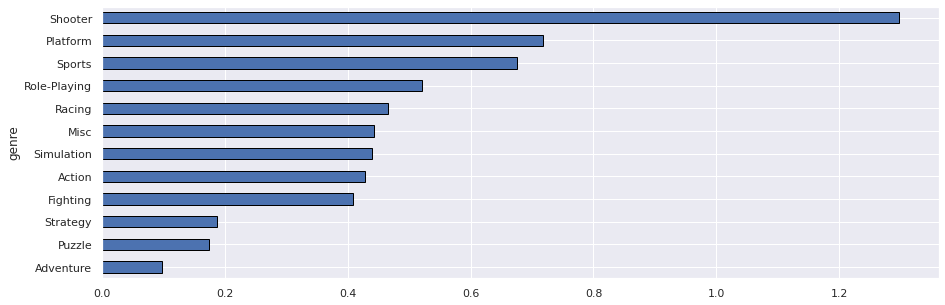

In [28]:
pivot['ratio'] = pivot['sum_sales'] / pivot['name']
pivot['ratio'].sort_values().plot(kind='barh', ec='black', figsize=(15,5));

Отсюда можно сделать вывод, что не смотря на большие объёмы продаж жанров Action и Role-Playing, самыми прибильными являются жанры Platform и Shooter. Аутсайдеры остались не изменны это Strategy, Puzzle и Adventure.   
Что бы полностью оценить прибыльность жанров не хватает данных о затратах на разработку типовых игр.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5).
 - Самые популярные жанры (топ-5).
 - Влияние рейтинга ESRB на продажи в отдельном регионе

Напишем функцию для построения графиков

In [29]:
def top5_in_regions_bar(groupby, region_sales, ax):
    pivot = df_2012.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'darkblue', 'eu_sales': 'blue', 'jp_sales': 'lightblue'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(30)

### Самые популярные платформы по регионам
Построим графики

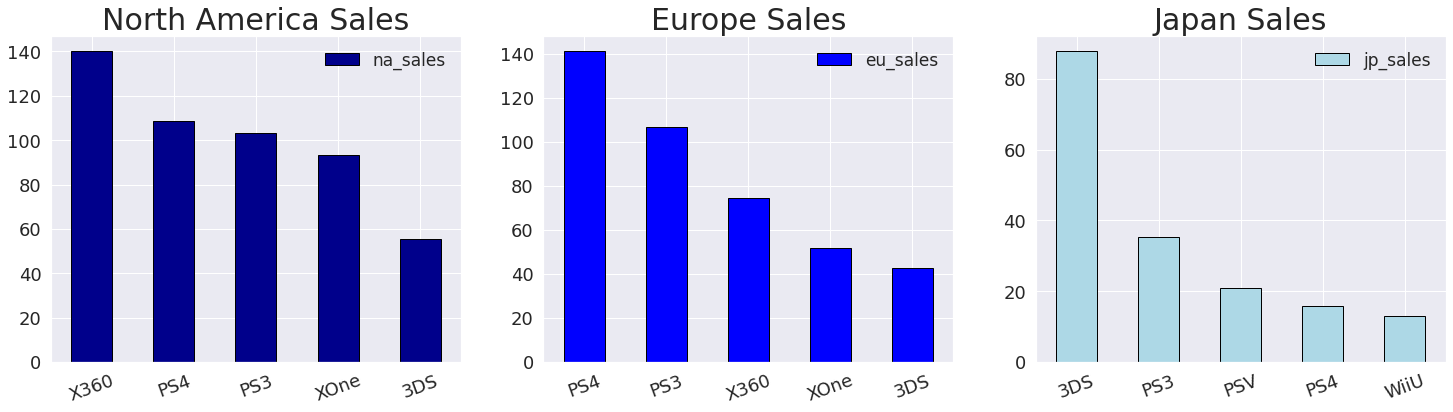

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top5_in_regions_bar('platform', 'na_sales', 0)
top5_in_regions_bar('platform', 'eu_sales', 1)
top5_in_regions_bar('platform', 'jp_sales', 2)

В **Северной Америке** самая популярная платформа X360, далее практически делят второе место PS3 и PS4. Немного отстает XOne. Менее популярна японская 3DS.

В **Европе** самая популярная платформа PS4. далее идут PS3 и X360. Последнее место делят XOne и 3DS.

В **Японии**, как обычно, всё наоборот. Лидер - 3DS. За ними американские PS3, PSV и PS4. Завершает пятёрку WiiU.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 за .subplots. Графики получились очень наглядными и компактными. 

Возможно стоило рассмотреть pie, более привычные когда имеем дело с долями.
</div>

### Самые популярные жанры по регионам   
Построим графики

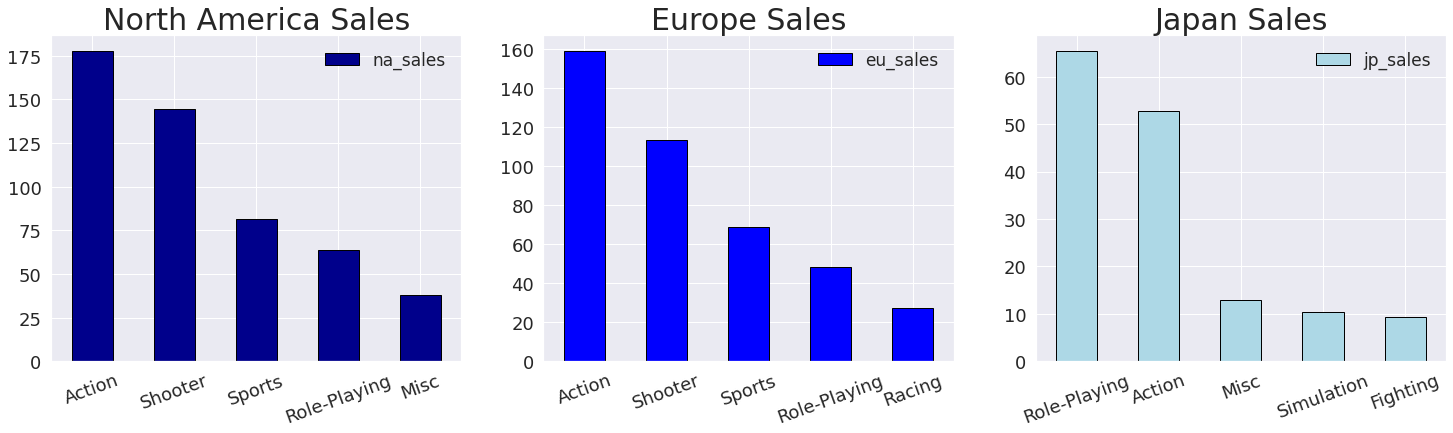

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top5_in_regions_bar('genre', 'na_sales', 0)
top5_in_regions_bar('genre', 'eu_sales', 1)
top5_in_regions_bar('genre', 'jp_sales', 2)

Вкусы в **Северной Америке** и **Европе** схожи: и там, и там живут фанаты Action, Sports и Shooter. В Северной Америке больше играют в Misc, в Европе же чаще выбирают Racing.

В **Японии** вкус совершенно иной - на первом месте Role-Playing, далее с небольшим отрывом Action. Остальные Misc, Simulation и Fighting занимают примерно одно место по популярности.

### Влияние рейтинга ESRB на продажи в отдельном регионе    
Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает.

In [32]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех', 'unknown': 'Не известен'}
df_2012['ESRB_description'] = df_2012['rating'].map(ESRB_dict)

/tmp/ipykernel_334/3344329258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['ESRB_description'] = df_2012['rating'].map(ESRB_dict)


Построим графики

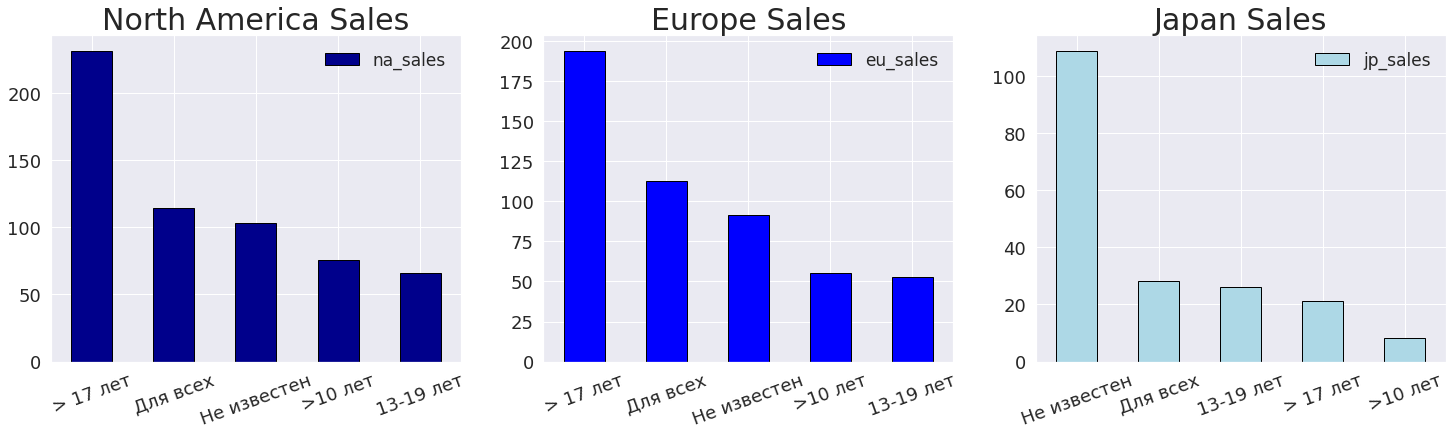

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top5_in_regions_bar('ESRB_description', 'na_sales', 0)
top5_in_regions_bar('ESRB_description', 'eu_sales', 1)
top5_in_regions_bar('ESRB_description', 'jp_sales', 2)

В **Свеверной Америке** и **Европе** всё идентично. Самым популярным возрастным рейтингом там является **>17 лет**, далее примерно на одном уровне идут рейтинги для Для всех и наши пропущенные значения, где мы решили проставить не известность рейтинга.   
В **Японии** не проставленный рейтинг является самым популярным, но скорее всего это связано с его отсутсвием. Далее идут Для всех, 13-19 лет и лишь только потом >17 лет, в отличии от Северной Америки и Европы.

## Проверка гипотез   
Проверим следующие гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC   
**Нулевая гипотеза H₀** - Средние пользовательские рейтинги платформ Xbox One и PC равны.   
**Альтернативная гипотеза H₁** - Средние пользовательские рейтинги платформ Xbox One и PC различны.   

Так как у нас две генеральных совокупности, по которым мы будем сопоставлять средние значения, применим метод `scipy.stats.ttest_ind()`.   
Для начала создадим наши выборки. И посмотрим на дисперсии.

In [35]:
xone_ratings = df_2012.query('platform == "XOne" and user_score >= 0')['user_score']
pc_ratings = df_2012.query('platform == "PC" and user_score >= 0')['user_score']
print(f'Дисперсия значений в рейтинге Xbox One = {np.var(xone_ratings):.2f}')
print(f'Дисперсия значений в рейтинге PC = {np.var(pc_ratings):.2f}')

Дисперсия значений в рейтинге Xbox One = 1.90
Дисперсия значений в рейтинге PC = 2.76


В `equal_var` поставим значение `False`, потому что дисперсии наших выборок отличаются.   
Критический уровень статистической значимости примем alpha = 5%.

In [36]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone_ratings, 
    pc_ratings,
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Здесь мы не можем отвергнуть нулевую гипотезу.   
Верное утверждение: **Средние пользовательские рейтинги платформ Xbox One и PC равны**   
Посмотрим на средние значения пользовательского рейтинга.

In [37]:
print(f'Средний пользовательский рейтинг плаформы Xbox One = {xone_ratings.mean():.2f}')
print(f'Средний пользовательский рейтинг плаформы PC = {pc_ratings.mean():.2f}')

Средний пользовательский рейтинг плаформы Xbox One = 6.52
Средний пользовательский рейтинг плаформы PC = 6.43


Игры созданные на плаформах PC и Xbox One имеют почти одинаковое среднее значение по пользовательскому рейтингу.   
С вероятностью почти 55% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

### Средние пользовательские рейтинги жанров Action и Sports   
**Нулевая гипотеза H₀** - Средние пользовательские рейтинги жанров Action и Sports одинаковые.   
**Альтернативная гипотеза H₁** - Средние пользовательские рейтинги жанров Action и Sports различны.   

У нас всё те же две не зависимые генеральные совокупности. Создадим выборки для проверки и посмотрим на дисперсию каждой.

In [38]:
action_ratings = df_2012.query('genre == "Action" and user_score >= 0')['user_score']
sports_ratings = df_2012.query('genre == "Sports" and user_score >= 0')['user_score']
print(f'Дисперсия значений в рейтинге Action = {np.var(action_ratings):.2f}')
print(f'Дисперсия значений в рейтинге Sports = {np.var(sports_ratings):.2f}')

Дисперсия значений в рейтинге Action = 1.89
Дисперсия значений в рейтинге Sports = 3.01


В `equal_var` поставим значение `False`, потому что дисперсии наших выборок отличаются.  
Критический уровень статистической значимости примем alpha = 5%.

In [39]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_ratings, 
    sports_ratings, 
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


Таким образом мы отвергаем нулевую гипотезу в пользу альтернативной - **Средние пользовательские рейтинги жанров Action и Sports различны**   
Вероятность получить результат, где нулевая гипотеза верна очень мала.

## Общий вывод

По результатам исследования можно сделать следующие выводы:

*Обзор данных*   
В данных имелось большое кол-во пропусков в значении рейтинга:   
`user_score` - 54.59%   
`critic_score` - 51.32%   
`rating` - 40.48%   

*Предобработка данных*   
Заменили тип данных в столбцах `user_score`, `year_of_release` и `critic_score`. В столбце `user_score` значение `tbd` заменили на `NaN`. Пропущенные значения в `rating` заменили на `unknown`. Дубликаты не были обнаружены. Рассчитали общую сумму продаж каждой игры по всем регионам в исходных данных.

*Исследовательский анализ данных.*   
Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция социальных сетей в жизнь людей. Интерес к играм стал падать и соотвественно их производство. Лидером по кол-ву выпущенных игр является платформа PS2, вслед за ней идёт DS, которая наступает данной платформе на пятки.   
Здесь мы так же выделили 6 лидеров по объёмам продаж:
 - `PS2` -	1255.77 млн. копий   
 - `X360` -	971.42 млн. копий   
 - `PS3` -	939.65 млн. копий   
 - `Wii` -	907.51 млн. копий   
 - `DS` -	806.12 млн. копий   
 - `PS` -	730.86 млн. копий   


Определили актуальный период, который выпадает на 2012 - 2016 года, так как за этот период уже вышли или только выходят все популярные платформы, а уже существующие ещё не утратили своей актуальности. Так же на конец 2016 года лидируют по продажам следующие платформы: PS4, Xone и 3DS. Лидерами по объёмам продаж в данный актуальный период являются: PS4, PS3, X360, 3DS, XOne.    
Больше всего на конечную прибыль влияет оценка критиков. Оценка пользователей практически не оказывает влияния на доходность игры. Данные по корреляции между выручкой и оценкой по платформам X360, PS3, WiiU, PS4 и XOne более или менее совпадает с общими данными по датафрейму.   
Не смотря на большие объёмы продаж жанров Action и Role-Playing, самыми прибильными являются жанры Platform и Shooter. Аутсайдеры остались не изменны это Strategy, Puzzle и Adventure.   
Что бы полностью оценить прибыльность жанров не хватает данных о затратах на разработку типовых игр.

*Составление портрета пользователя каждого региона*   
В Северной Америке самая популярная платформа X360, в Европе самая популярная платформа PS4 и в Японии лидер - 3DS.   
Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты Action, Sports и Shooter. В Северной Америке больше играют в Misc, в Европе же чаще выбирают Racing. В Японии вкус совершенно иной - на первом месте Role-Playing, далее с небольшим отрывом Action. Остальные Misc, Simulation и Fighting занимают примерно одно место по популярности.   
Самым популярным возрастным рейтингом в Европе и Северной Америке является ">17 лет", в Японии не проставленный рейтинг является самым популярным, но скорее всего это связано с его отсутсвием как такового изначально

*Проверка гипотез*   
Средние пользовательские рейтинги платформ Xbox One и PC равны, а вот средние пользовательские рейтинги жанров Action и Sports наоборот различны.

В целом следует отметить что рынок "не мобильных игр" падает. Это отлично видно на графике динамики продаж за актуальный период. Больше всего на прибыль оказывает влияние оценка поставленная киритиками, на этом и следует акцентровать внимание при подготовке рекламной компании.   
Если не смотря на падающий рынок рекламная компания уже запланирована, то она должна быть запущена исходя из следующих требований:

 - Игра должна быть выпущена на актуальной топопвой платформе такой как PS4 или X360 для Северной Америки и Европы, и 3DS для Японии.
 - Игра должна быть ориентирована на возрастной рейтинг ">17 лет".
 - Для Свереной Америки и Европы подходящими жанрами будут Action, Shooter и Sports, для Японии Role-Playing и Action.